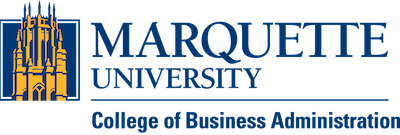

# *BUAN 4061: Advanced Business Analytics*

# **Assignment 4: Predicting Stock Price**

Instructor: Dr. Badar Al Lawati

**Acknowledgment**: This material is based on the content created by `Dr. Kambiz Saffarizadeh`

---
Disclaimer: The predictions provided by this Notebook are only for educational purposes. I don't take responsibility for any trading decision that may be made based on these predictions.
---

# Assingment Requirements


1.   Go through this Notebook and add explanations to each piece of code such that a person who is not familiar with Python and TensorFlow can understand what is going on
2.   Create and train `model3` and then plot a figure inidcating predictions from `model1`, `model2`, and `model3`
3.   Save this Notebook and submit the .ipynb file

# Yahoo Finance

In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
import tensorflow as tf

In [3]:
plt.style.use("fivethirtyeight")

# Download the dataset

In [4]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

In [5]:
company_data = yf.download('AAPL', start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
company_data['company_name'] = 'AAPL'

# Explore the dataset

In [7]:
company_data.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2014-04-15,18.581072,18.629999,18.261786,18.498571,16.293827,266490000,AAPL
2014-04-16,18.501785,18.610357,18.362143,18.536072,16.326859,214765600,AAPL
2014-04-17,18.571428,18.848572,18.542856,18.747856,16.513390,284334400,AAPL
2014-04-21,18.762142,19.004999,18.712856,18.970358,16.709383,182548800,AAPL
2014-04-22,18.868214,18.993929,18.803572,18.989286,16.726055,202563200,AAPL


In [8]:
company_data.shape

(2517, 7)

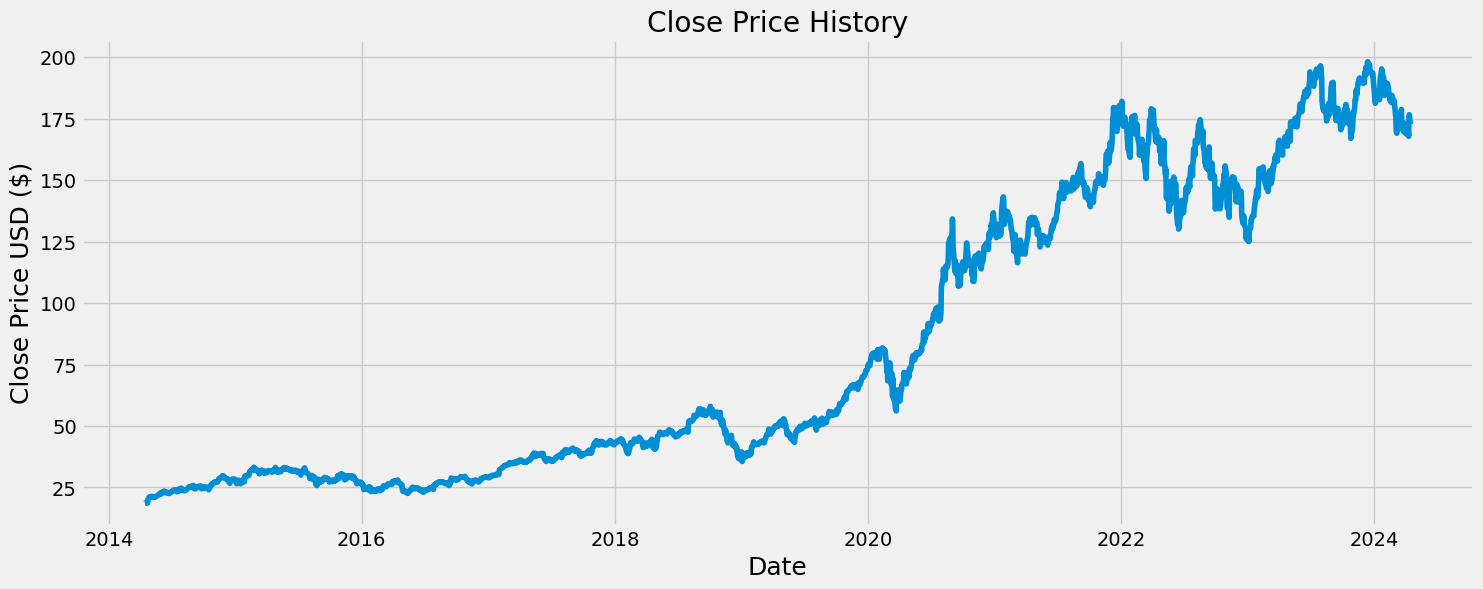

In [9]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(company_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Create a useful dataset to train our model

Standardize or normalize data in the close price column.

In [10]:
dataset = (company_data['Close'] - company_data['Close'].min()) / (company_data['Close'].max() - company_data['Close'].min())

In [11]:
dataset.shape

(2517,)

Let's create a dataset to predict the price of stock at time `t` based on the prices in the previous `60` days.

In [12]:
window = 60

In [13]:
x_data = []
y_data = []

for t in range(60, len(dataset)):
    x_data.append(dataset[t-window:t])
    y_data.append(dataset[t])

In [14]:
x_data[0]

Date
2014-04-15    0.000000
2014-04-16    0.000209
2014-04-17    0.001388
2014-04-21    0.002627
2014-04-22    0.002732
2014-04-23    0.001350
2014-04-24    0.009904
2014-04-25    0.010733
2014-04-28    0.015138
2014-04-29    0.014788
2014-04-30    0.014342
2014-05-01    0.014619
2014-05-02    0.014838
2014-05-05    0.016504
2014-05-06    0.015201
2014-05-07    0.014788
2014-05-08    0.013925
2014-05-09    0.013438
2014-05-12    0.014887
2014-05-13    0.015072
2014-05-14    0.015094
2014-05-15    0.014090
2014-05-16    0.015818
2014-05-19    0.017226
2014-05-20    0.017250
2014-05-21    0.017568
2014-05-22    0.017759
2014-05-23    0.019123
2014-05-27    0.021409
2014-05-28    0.021087
2014-05-29    0.023348
2014-05-30    0.022875
2014-06-02    0.022010
2014-06-03    0.023778
2014-06-04    0.025225
2014-06-05    0.025728
2014-06-06    0.025374
2014-06-09    0.027428
2014-06-10    0.028194
2014-06-11    0.027651
2014-06-12    0.025466
2014-06-13    0.024060
2014-06-16    0.025340
2014-0

In [15]:
y_data[0]

0.029543937891420298

In [16]:
x_train = x_data[: int(len(dataset)*0.8)]
y_train = y_data[: int(len(dataset)*0.8)]
x_train = np.array(x_train)
y_train = np.array(y_train)

x_validation = x_data[int(len(dataset)*0.8)-window:]
y_validation = y_data[int(len(dataset)*0.8)-window:]
x_validation = np.array(x_validation)
y_validation = np.array(y_validation)

In [17]:
x_train.shape

(2013, 60)

In [18]:
x_train = x_train[:, :, np.newaxis]
x_validation = x_validation[:, :, np.newaxis]

In [19]:
x_train.shape

(2013, 60, 1)

In [20]:
x_validation.shape

(504, 60, 1)

# Create the model

In [21]:
model1 = tf.keras.Sequential([
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(25),
  tf.keras.layers.Dense(1)
])

In [22]:
model1.compile(
    optimizer='adam',
    loss='mse'
)

In [23]:
history1 = model1.fit(x_train, y_train, epochs=5, validation_data=(x_validation, y_validation))

Epoch 1/5
63/63 [==============================] - 6s 16ms/step - loss: 0.0239 - val_loss: 0.0265
Epoch 2/5
63/63 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.0049
Epoch 3/5
63/63 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 4/5
63/63 [==============================] - 1s 9ms/step - loss: 0.0013 - val_loss: 0.0043
Epoch 5/5
63/63 [==============================] - 1s 8ms/step - loss: 0.0013 - val_loss: 0.0044


In [24]:
model2 = tf.keras.Sequential([
  tf.keras.layers.LSTM(128, return_sequences=True),
  tf.keras.layers.LSTM(128),
  tf.keras.layers.Dense(25),
  tf.keras.layers.Dense(1)
])

In [25]:
model2.compile(
    optimizer='adam',
    loss='mse'
)

In [26]:
history2 = model2.fit(x_train, y_train, epochs=1, validation_data=(x_validation, y_validation))

63/63 [==============================] - 13s 46ms/step - loss: 0.0072 - val_loss: 0.0011


# Make predictions

In [27]:
predictions1 = model1.predict(x_validation)
predictions2 = model2.predict(x_validation)

16/16 [==============================] - 1s 5ms/step


We scaled down the close price values before. Here we convert them back to the origirnal scale.

In [28]:
predictions1 = (predictions1 * (company_data['Close'].max() - company_data['Close'].min())) + company_data['Close'].min()
predictions2 = (predictions2 * (company_data['Close'].max() - company_data['Close'].min())) + company_data['Close'].min()

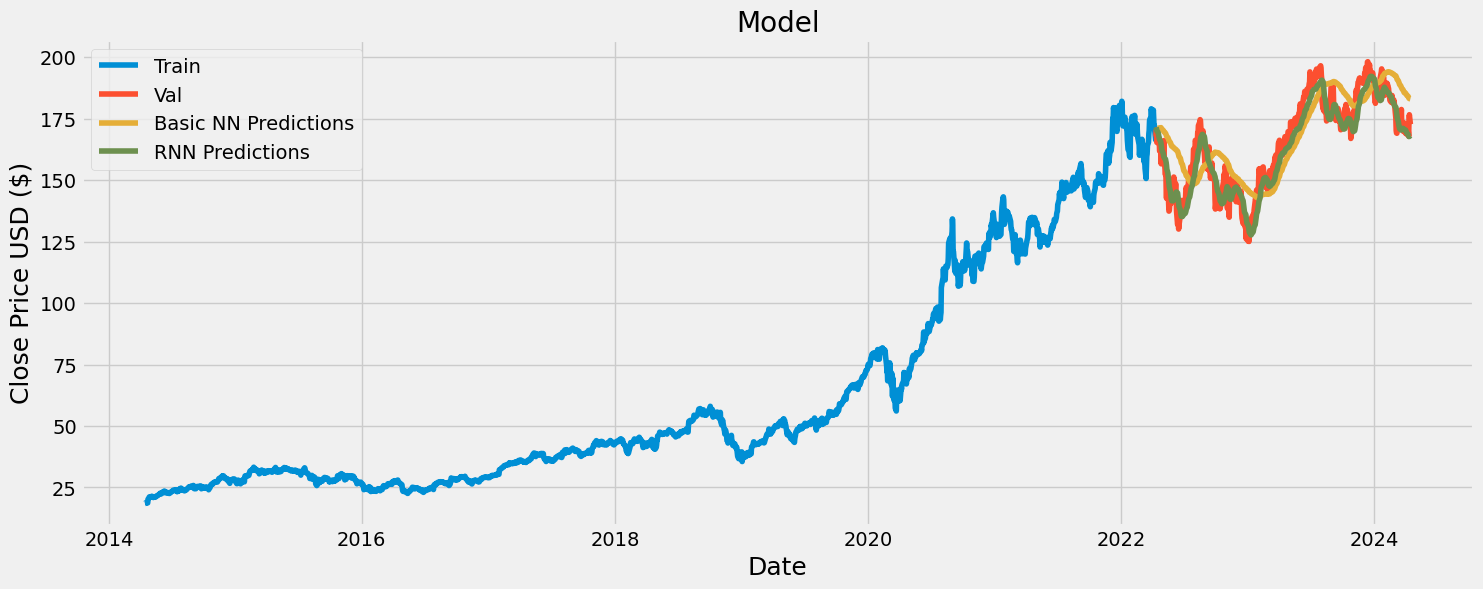

In [29]:
train = company_data[: int(len(company_data)*0.8)]
valid = company_data[int(len(company_data)*0.8): ]
predi1 = pd.Series(predictions1.squeeze(), index=valid.index)
predi2 = pd.Series(predictions2.squeeze(), index=valid.index)

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(predi1)
plt.plot(predi2)

plt.legend(['Train', 'Val', 'Basic NN Predictions', 'RNN Predictions'], loc='upper left')
plt.show()

# Create `model3` using `Conv1D` layers

Use one or more `Conv1D` layers to create a new model to predict the stock price. Note that unlike when we used convolutional layers for images, here we are not dealing with 2-dimensional images. Instead we are dealing with 1-dimensional series, which represent vectors of prices. Thus, why we use `Conv1D` instead of `Conv2D`. You still need to specify the number of filters and kernel size. To specify kernel size, you need to choose a single number instead of choosing a 2-dimensional tuple (remember before we would choose something like (3,3); but here we need a 1-dimensional kernel, so we only need one number like 10).

In [30]:
# create model3


In [31]:
# compile model3


In [32]:
# train model3


When you're finished with `model3`, run the following cell to plot the results.

In [33]:
predictions1 = model1.predict(x_validation)
predictions2 = model2.predict(x_validation)
predictions3 = model3.predict(x_validation)

predictions1 = (predictions1 * (company_data['Close'].max() - company_data['Close'].min())) + company_data['Close'].min()
predictions2 = (predictions2 * (company_data['Close'].max() - company_data['Close'].min())) + company_data['Close'].min()
predictions3 = (predictions3 * (company_data['Close'].max() - company_data['Close'].min())) + company_data['Close'].min()

train = company_data[: int(len(company_data)*0.8)]
valid = company_data[int(len(company_data)*0.8): ]
predi1 = pd.Series(predictions1.squeeze(), index=valid.index)
predi2 = pd.Series(predictions2.squeeze(), index=valid.index)
predi3 = pd.Series(predictions3.squeeze(), index=valid.index)

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(predi1)
plt.plot(predi2)
plt.plot(predi3)

plt.legend(['Train', 'Val', 'Basic NN Predictions', 'RNN Predictions', 'CNN Predictions'], loc='upper left')
plt.show()

16/16 [==============================] - 0s 5ms/step


NameError: name 'model3' is not defined